In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from esg import EconomicScenarioGenerator

In [84]:
corr = np.array([[1.0, 0.032], [0.032, 1.0]])
headers = "['AK_SV', 'AK_WORLD']"
s0 = np.array([393.0, 28.5])
ar = np.array([0.0,1.0])
mu = np.array([0.2, 0.4])
sigma = np.array([0.16,0.1])

In [85]:
N,t_steps, partition = 10, 24, 12
ESG = EconomicScenarioGenerator(s0, ar, mu, sigma, corr)

In [86]:
S = ESG.get_scenarios(N,t_steps, partition)

In [88]:
S.shape

(10, 24, 2)

In [89]:
S[:4,:5,:]

array([[[393.        ,  28.5       ],
        [406.74888984,  26.14681157],
        [401.18089923,  23.99087275],
        [402.57208464,  22.04168107],
        [412.78548156,  20.24177268]],

       [[393.        ,  28.5       ],
        [404.83158479,  26.11570724],
        [417.7296839 ,  23.97005402],
        [420.84071309,  22.03444899],
        [408.6142346 ,  20.2647062 ]],

       [[393.        ,  28.5       ],
        [377.28529096,  26.19865122],
        [371.31283583,  24.0561097 ],
        [375.60630835,  22.00802784],
        [363.42033253,  20.20737508]],

       [[393.        ,  28.5       ],
        [434.47407278,  26.16809766],
        [440.55208366,  24.04831565],
        [477.23490686,  22.09610443],
        [468.39061127,  20.28903265]]])

In [90]:
df = pd.DataFrame(S.reshape(-1, S.shape[-1]), columns=['S', 'R'])

In [91]:
df.head()

,S,R
0,393.000000,28.500000
1,406.748890,26.146812
2,401.180899,23.990873
3,402.572085,22.041681
4,412.785482,20.241773


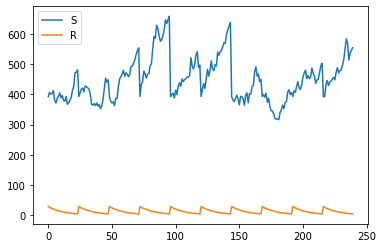

In [93]:
df.plot()

In [95]:
df['N'] = np.nan
df['t'] = np.nan

In [102]:
df.N = df.index // t_steps
df.t = df.index % t_steps

In [105]:
df.to_csv('szenarios.csv', index=False)